YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  3 of 3 completed


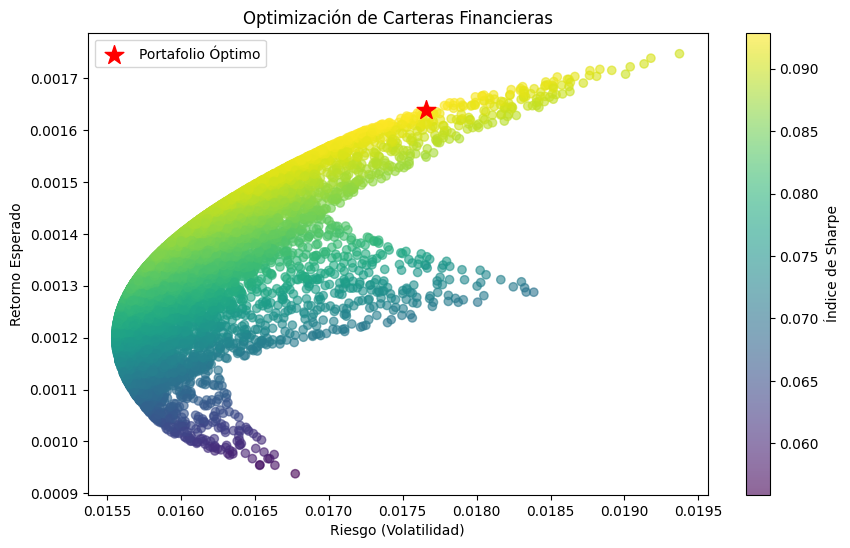

Pesos del portafolio óptimo:
AAPL: 24.64%
GOOGL: 75.12%
AMZN: 0.23%


In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Definir los Activos Financieros
tickers = ['AAPL', 'GOOGL', 'AMZN']
data = yf.download(tickers, start="2015-01-01", end="2020-12-31")['Close']

# 2. Calcular Retornos Diarios
returns = data.pct_change().dropna()

# 3. Calcular Media de Retornos y Matriz de Covarianza
mean_returns = returns.mean()
cov_matrix = returns.cov()

# 4. Crear Portafolios Aleatorios
num_portfolios = 10000
results = np.zeros((3, num_portfolios))  # [Retorno, Riesgo, Sharpe Ratio]
weights_record = np.zeros((num_portfolios, len(tickers)))  # Para almacenar los pesos

risk_free_rate = 0.0  # Tasa libre de riesgo

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)  # Normalización de pesos

    # Guardamos los pesos
    weights_record[i, :] = weights

    # Cálculo del retorno y riesgo del portafolio
    portfolio_return = np.sum(weights * mean_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

    # Índice de Sharpe (evitando división por cero)
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_volatility if portfolio_volatility != 0 else 0

    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = sharpe_ratio

# 5. Encontrar el Portafolio Óptimo (máximo índice de Sharpe)
max_sharpe_idx = np.argmax(results[2, :])  # Índice de la mejor cartera
max_sharpe_return = results[0, max_sharpe_idx]
max_sharpe_volatility = results[1, max_sharpe_idx]
max_sharpe_weights = weights_record[max_sharpe_idx, :]  # Pesos correctos

# 6. Visualización
plt.figure(figsize=(10, 6))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis', alpha=0.6)
plt.colorbar(label='Índice de Sharpe')

# Marcar el portafolio óptimo
plt.scatter(max_sharpe_volatility, max_sharpe_return, color='red', marker='*', s=200, label='Portafolio Óptimo')

plt.title('Optimización de Carteras Financieras')
plt.xlabel('Riesgo (Volatilidad)')
plt.ylabel('Retorno Esperado')
plt.legend()
plt.show()

# 7. Mostrar los Pesos del Portafolio Óptimo
print("Pesos del portafolio óptimo:")
for asset, weight in zip(tickers, max_sharpe_weights):
    print(f"{asset}: {weight:.2%}")